# Lab Assignment 4

## Liu Rongxing, s1810054


PLEASE LOOK AT THE PDF FILE FOR THE INSTRUCTION AND THE PROBLEM STATEMENT. THIS IS JUST A TEMPLATE TO WRITE YOUR ANSWERS IN!



## Task 1

The following code defines the `plot_approx` function, which produces a plot of the Fourier series approximation of a given function. To achieve this, we first defined a function `approx_fourier` that gives the fourier approximation of the given function.

In [49]:
import sympy as sym
import sympy.plotting as sym_plot
sym.init_printing()
from IPython.display import display_latex

def approx_fourier(f, L, num_terms):  
    a0 = (sym.integrate(f, (x,-L,L)))/L
    an = (sym.integrate(f*sym.cos(n*sym.pi*x/L), (x, -L, L)))/L
    bn = (sym.integrate(f*sym.sin(n*sym.pi*x/L), (x, -L, L)))/L
    fterms = a0/2 + sym.Sum(an*sym.cos(n*sym.pi*x/L)+bn*sym.sin(n*sym.pi*x/L), (n,1,num_terms))
    f_expr = fterms.doit()
    return f_expr

def plot_approx(f, L, num_terms):
    f_expr=approx_fourier(f, L, num_terms)
    f_plot = sym_plot.plot((f_expr,(x,-2*L,2*L)), (f,(x,-L,L)), show  = False)
    f_plot[0].line_color = "blue"
    f_plot[1].line_color = "red"
    f_plot.show()

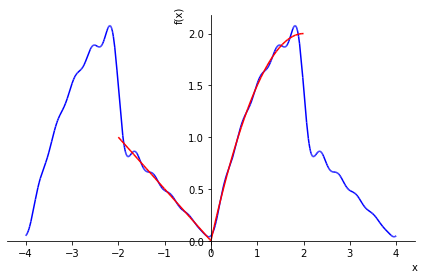

In [50]:
x,n = sym.symbols('x, n')

#This defines f(x) in the question.
f = sym.Piecewise((2*x-(x**2)/2, (x>=0)), (-x/2, (x<0)))

#This plots the fourier approximation with first 10 terms.
plot_approx(f,2,10)

## Task 2

First we set up the given parameters and initial conditions, then compute the coefficients $c_n$:

In [59]:
L = 10
x,n = sym.symbols('x, n')
f = sym.Piecewise((1, ((L/2-1<x)&(x<L/2+1))), (0, ((x>=L/2+1)|(x<=L/2-1))))

cn = sym.Rational(2,L)*sym.integrate(f*sym.sin(n*sym.pi*x/L), (x, 0, L))
cn.simplify()

⎧2⋅(cos(0.4⋅π⋅n) - cos(0.6⋅π⋅n))                            
⎪───────────────────────────────  for n > -∞ ∧ n < ∞ ∧ n ≠ 0
⎨              π⋅n                                          
⎪                                                           
⎩               0                         otherwise         

Now, the overall solution for $u(x,t)$ is approximated by taking just the first 300 terms of the sum:

In [60]:
t = sym.symbols('t')
u_symbolic = sym.Sum(cn.simplify()*sym.sin(n*sym.pi*x/L)*sym.cos(n*sym.pi*a*t/L), (n,1,300))
#u_symbolic.doit()

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

fps = 2 # number of frames per second

fig, ax = plt.subplots()

x_vals = np.linspace(0,L,200)

u = sym.lambdify([x, t], u_symbolic, modules='numpy')

# set up the initial frame
line, = ax.plot(x_vals, u(x_vals,0), 'k-')
plt.plot(x_vals,u(x_vals,0),'r:')
plt.xlabel('x')
plt.ylabel('u')
plt.ylim(-0.5,1.5)
plt.close()

# add an annotation showing the time (this will be updated in each frame)
txt = ax.text(0, 1.3, 't=0')

def init():
    line.set_ydata(u(x_vals,0))
    return line,

def animate(i):
    line.set_ydata(u(x_vals,i/fps))  # update the data
    txt.set_text('t='+str(i/fps)) # update the annotation
    return line, txt


ani = animation.FuncAnimation(fig, animate, np.arange(0, fps*20.5), init_func=init,
                              interval=10, blit=True, repeat=False)

In [66]:
HTML(ani.to_jshtml())

In [67]:
ani.save('hdeq_lab4_task2.mp4', writer='ffmpeg', fps=20)

As shown by the animation, from $t=0$ to $t=5$, energy is propagated from the center of the string to both ends. Then the vibration goes downwards. From $t=5$ to $t=10$, energy is propagated towards to the center, and the amplitude of vibration reaches the lowest. From $t=10$ to $t=15$, the energy is again propagated to bothsides and from $t=15$ to $t=20$, the energy is propagated towards the center again, and the string goes back to its original state.